<a href="https://colab.research.google.com/github/anthonypinter/atls2200.github.io/blob/main/atlas2200_webscraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Webscraping 101

In this notebook, we'll explore how to use BeautifulSoup (BS4) to scrape data from a stored HTML page. We'll pull a page from Pitchfork (P4K) using urllib, and explore it's HTML to find useful and interesting data using BS4.

### Imports

Nothing too special here -- we just need these to make our data scraping pipeline work.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

### Getting the URL

Let's start by getting the HTML for the review we want to scrape. Let's use SAULT's new album "Air".

We need a URL, and then we'll tell urllib to open it using the urlopen() function. Here's the syntax:

```
variableName = urlopen(url)
```



In [ ]:
url = "https://pitchfork.com/reviews/albums/sault-air/" # <--- later, you can replace this with the URL of your album of choice from P4K.
html = urlopen(url)

### "Making the Soup"

Now that we've collected the HTML of the page we're interested in, let's load it up into BeautifulSoup. This is called "making the soup", and it results in an object that we can then parse for data. The basic syntax is:

```
soup = BeautifulSoup(variableName, parser)
```

The *BeautifulSoup()* function makes the soup. It takes two arguments: *variableName* and *parser*.

*variableName* is whatever variable you used when collecting the HTML of your webpage. Here we made it *html*.

*parser* tells the BeautifulSoup function the type of parser to use. There are a number of different parsers. For the moment, don't worry about this -- we'll use *'lxml'*.

In [ ]:
soup = BeautifulSoup(html, 'lxml')

### Using tags to find data from the HTML

Let's start by using tags to navigate the HTML tree. As a quick reference, here's the screenshot of the HTML (but it might be easier to have a browser up for reference):

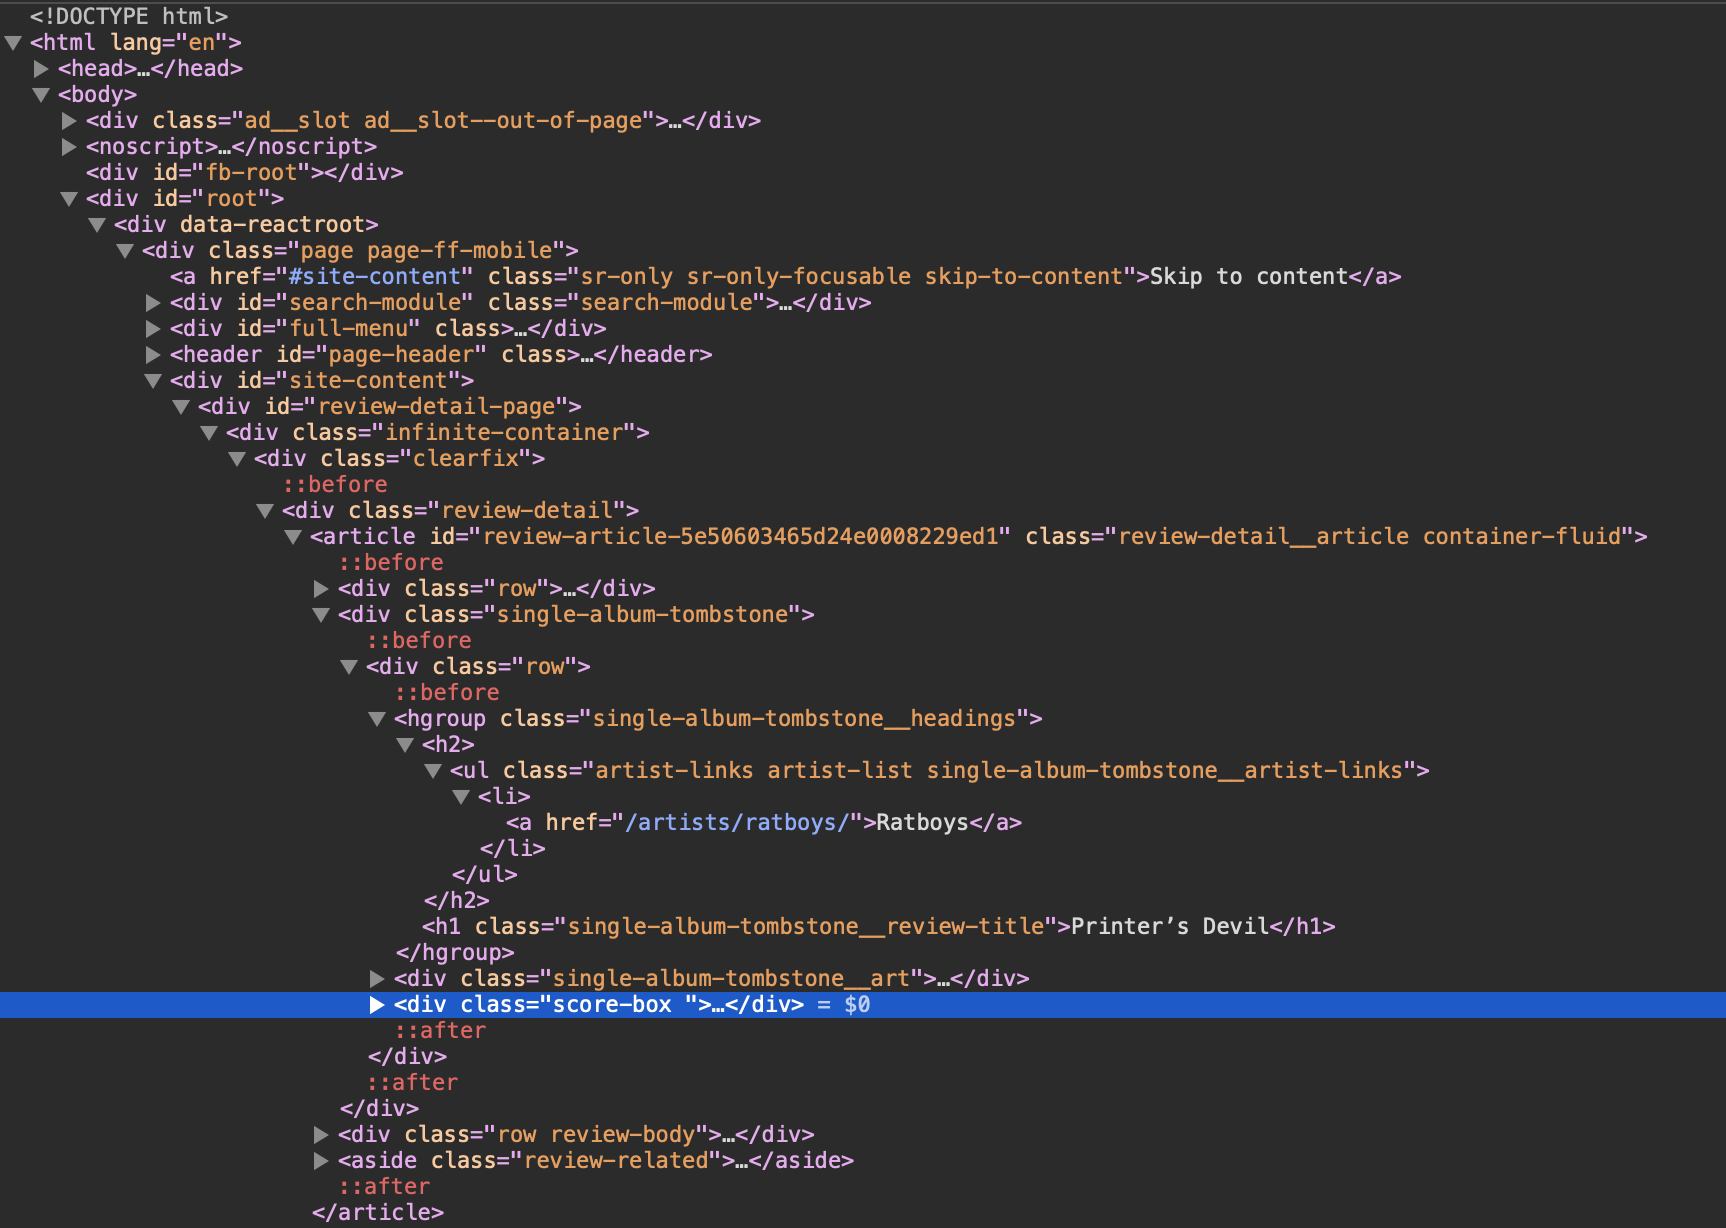

Let's start with the title of the album: "Air".

To use tags, we just want to find the shortest set of tags to isolate the point in the HTML where the title of the album appears.

The general syntax here is:

```
variableName = soup.tag.string
print(variableName)
```

*variableName* is whatever you want your variable name to be. 

*soup* just tells the computer that we're searching the soup that we made earlier.

*.tag* is the tag that you're interested in finding. Remember, this is nested, so you can have a syntax like *.tag.tag.tag*.

*.string* converts it to a string, so we can print it and read it (or, in more complicated set-ups, save it).



In [ ]:
album_title = soup.h1.string
print(album_title)

Air


So we should have the title. Let's do the artist "Ratboys" next.


### Using CSS classes and .find() to find data from the HTML

Using tags and navigating that tree is useful, and we could probably use it for all the data we'd need on this page. But let's demonstrate a different way to do it.

Let's find data using the CSS class associated with the data. We can do that using the .find() method that BeautifulSoup provides us. The basic syntax is:

```
variableName = soup.find('tag', class_='class').string
```

*tag* is the HTML tag we're intersted in

*class_=* is part of the method. Can you guess why it's "class_" and not "class"?

*class* is the CSS class we're interested in finding within the HTML document.

Let's begin playing with the .find() method by finding the score that Printer's Devil got on Pitchfork. Refer to the HTML image above or open it in your own browser.


In [ ]:
artist_name = soup.find('a', class_='BaseWrap-sc-TURhJ BaseText-fFzBQt BaseLink-gZQqBA SplitScreenContentHeaderArtistLink-bpAUMk eTiIvU iscnmf hMaxUE cQHYrQ')
print(artist_name.string)
print(artist_name.get('href'))

SAULT
/artists/sault/


Notice here we print two separate lines out -- one with the string containing the artist's name, the other with the URL for the artist. That *find* method let's us look for specific values for specific classes within the tag we're working with. So here we're working with the 'a' element, and we can grab the string and the hyperlink reference (href) by using .string and .get('href'), respectively.

In [ ]:
score = soup.find('p', class_='BaseWrap-sc-TURhJ BaseText-fFzBQt Rating-kkunXa eTiIvU geimFR hVIWTS').string

print(score)

AttributeError: ignored

In [ ]:
genre = soup.find("p", class_="BaseWrap-sc-TURhJ BaseText-fFzBQt InfoSliceValue-gSTMso eTiIvU bsGTGn").string
print(genre)

Experimental


In [ ]:
date = soup.find("time").string
print(date)

#### Special Cases

The following parses require a little bit more work to get the data into a useful format. Let's tackle them one by one.

First, getting the author name and URL. This is very similar to getting the artist's name and URL. Use that as a reference for the print statements.

In [ ]:
author = soup.find("span", class_="by")
print(author.string)
print(author.get("href"))

Next, the album art.

In a more complicated set-up, we could write some code to actually save the image. But trust me, you want to be careful about that -- 20,000+ images is a lot of data. Let's just get the link instead.

Here, we use the .find(), but we don't need a class. We just need the attribute, because there's only one image on the screen (the other ones are ads and the like, so we can pretend they don't exist).

Then, we can use that .get() method again to get the URL from the img tag.

In [ ]:
album_art = soup.find("img")
print(album_art.get("src"))

Now for the year the album was released. We'll use the .get_text() method to grab the text of the tag. 

You'll notice when you print it the fist time around, the year comes with that annoying dot and a few spaces. That's just formatting, so let's get rid of it with a .strip() method.

In [ ]:
year = soup.find("span", class_="single-album-tombstone__meta-year").get_text()
print(year)

year = year.strip(" • ")
print(year)

.get_text() does the same thing as .string, but is less specific. Let's demonstrate this quirk on the abstract of the review.

The tag and class is the same for bother of the following queries, but notice when we use .string we have to get more specific about where in the HTML we are parsing.

In [ ]:
abstract = soup.find("div", class_="review-detail__abstract").p.string
print(abstract)

abstract_get_text = soup.find("div", class_="review-detail__abstract").get_text()
print(abstract_get_text)

The ease of .get_text() is useful. It lets us grab big chunks of text without having to be hyperspecific. For example, with the body of the review.

In [ ]:
review_text_corpus = soup.find("div", class_="contents dropcap")
print(review_text_corpus.get_text())

Our output picks up two lines at the bottom about buying the album. We could strip that out, but let's leave it for now. Don't copy that when you do the next part of the activity.

Last, but not least, the accolade!

There are two accolades an album can receive -- Best New Music, and Best New Reissue. Not all albums have an accolade, and an album can only receive one of the accolades (i.e., we can't have an album that is Best New Music AND Best New Reissue).

So we'll need to do a bit of logic here to find the accolade, if it exists. In both the if and elif statements, the TAG and CLASS are the same.

In [ ]:
if soup.find("p", class_="bnm-txt") == "Best new music":
  accolade = "Best new music"
elif soup.find("p", class_="bnm-txt") == "Best new reissue":
  accolade = "Best new reissue"
else:
  accolade = ""
print(accolade)